###**SUPERVISED LEARNING -BOOSTING ALGORITHMS FOR 5000 SAMPLES PER CLASS.**

# Import Data for X and y

In [ ]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
with open('/content/df_features_train5000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [ ]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_116-069-127,0,-557.202515,5.753622,0.981412,1.122305,-0.707372,-0.898609,-2.331761,-2.756625,-2.927740,...,0.201430,0.145789,0.131073,0.208323,0.217919,0.228780,0.417073,0.268706,0.291228,0
bass_synthetic_018-045-050,1,-485.269135,36.706520,1.167640,9.230674,6.142095,1.939157,0.921259,2.714334,2.793374,...,0.070766,0.107711,0.089044,0.094892,0.183850,0.316033,0.617227,0.313992,0.194215,0
bass_synthetic_011-040-075,0,-133.168488,111.227852,-37.395962,53.720230,-23.686741,31.263220,-22.156073,11.038134,-9.746903,...,0.144702,0.892014,0.050649,0.004439,0.000000,0.186057,0.000895,0.000000,0.327075,0
bass_synthetic_076-046-050,0,-382.084808,118.211998,26.205984,30.567608,59.839611,35.354507,12.117772,24.512486,22.956745,...,0.025208,0.017774,0.017762,0.017743,0.034988,0.064068,0.182555,0.841185,0.145308,0
bass_synthetic_136-070-075,0,-569.803589,25.864410,14.324016,12.227025,7.293108,4.873456,2.179953,1.358275,1.030449,...,0.263737,0.236430,0.261355,0.279773,0.167548,0.234745,0.059394,0.464480,0.081960,0


In [ ]:
df_train.shape

(50000, 167)

In [ ]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [ ]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [ ]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

In [ ]:
X_test.shape

(4096, 166)

In [ ]:
y_test.shape

(4096,)

# Define Confusion Matrix Function

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [ ]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Adaptive Boosting

In [ ]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=256,
                         learning_rate=1)

In [ ]:
# Train Adaboost Classifer
model = ada.fit(X_train, y_train)

In [ ]:
y_pred_ada = ada.predict(X_test)
accuracy_ada = np.mean(y_pred_ada == y_test)
print("The accuracy of Adaptive Boosting is {0:.2%}".format(accuracy_ada))

The accuracy of Adaptive Boosting is 28.12%


Normalized confusion matrix
[[0.26690391 0.         0.         0.24673784 0.15895611 0.16014235
  0.02253855 0.         0.         0.14472123]
 [0.         0.133829   0.20446097 0.         0.02230483 0.11895911
  0.01858736 0.01858736 0.10037175 0.38289963]
 [0.         0.13888889 0.26666667 0.         0.         0.21111111
  0.07777778 0.         0.         0.30555556]
 [0.14263804 0.00920245 0.         0.21779141 0.23006135 0.19325153
  0.04294479 0.         0.         0.16411043]
 [0.18015666 0.00391645 0.         0.15274151 0.28067885 0.18407311
  0.10443864 0.         0.         0.09399478]
 [0.08415842 0.         0.         0.26237624 0.15841584 0.4950495
  0.         0.         0.         0.        ]
 [0.01394422 0.08964143 0.05776892 0.         0.03984064 0.07968127
  0.44223108 0.02390438 0.         0.25298805]
 [0.         0.18723404 0.03404255 0.         0.12765957 0.22978723
  0.         0.05106383 0.13191489 0.23829787]
 [0.05228758 0.01633987 0.         0.0130719  0.20261

<Axes: title={'center': 'Adaptive Boosting Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

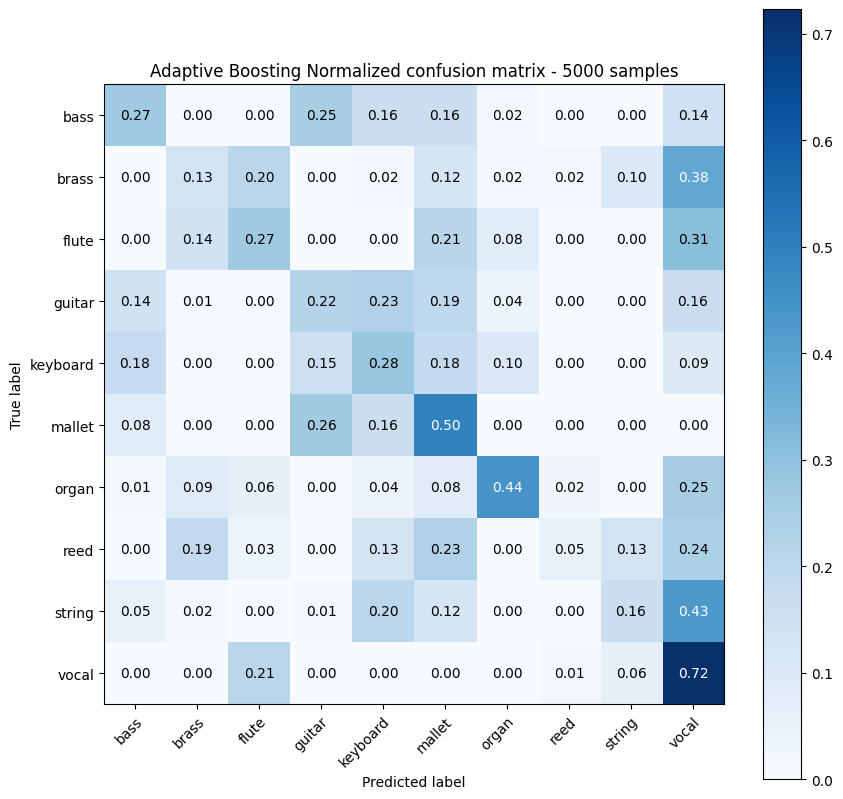

In [ ]:
plot_confusion_matrix(y_test, y_pred_ada, classes=class_names, normalize=True,
                      title='Adaptive Boosting Normalized confusion matrix - 5000 samples')

# Gradient Boosting

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.01)

In [ ]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [ ]:
y_pred_GB = gradient_booster.predict(X_test)
accuracy_GB = np.mean(y_pred_GB == y_test)
print("The accuracy of Gradient boosting is {0:.2%}".format(accuracy_GB))

The accuracy of Gradient boosting is 40.43%


Normalized confusion matrix
[[0.47330961 0.         0.00118624 0.09371293 0.16963227 0.16725979
  0.0688019  0.01660735 0.00237248 0.00711744]
 [0.00371747 0.4535316  0.0669145  0.02230483 0.07806691 0.
  0.         0.01115242 0.07063197 0.2936803 ]
 [0.16666667 0.00555556 0.55555556 0.         0.01111111 0.14444444
  0.01666667 0.01111111 0.01111111 0.07777778]
 [0.15490798 0.05214724 0.00460123 0.31595092 0.22239264 0.17177914
  0.00766871 0.01380368 0.0291411  0.02760736]
 [0.21932115 0.04569191 0.00391645 0.20234987 0.30156658 0.15926893
  0.03785901 0.00522193 0.00130548 0.02349869]
 [0.17326733 0.0049505  0.         0.04455446 0.07425743 0.65841584
  0.02970297 0.01485149 0.         0.        ]
 [0.06772908 0.05577689 0.03784861 0.00199203 0.0438247  0.03386454
  0.48007968 0.04780876 0.08565737 0.14541833]
 [0.         0.19148936 0.05957447 0.16170213 0.01276596 0.09361702
  0.00425532 0.13191489 0.28085106 0.06382979]
 [0.10457516 0.         0.00326797 0.10457516 0.12418301 0.0

<Axes: title={'center': 'Gradient boosting Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

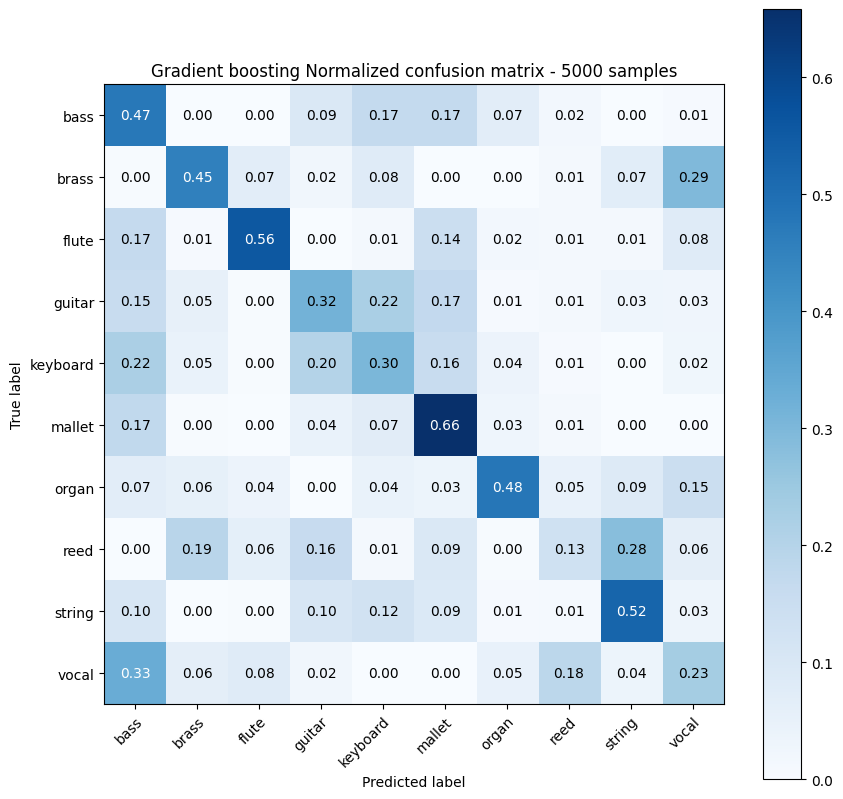

In [ ]:
plot_confusion_matrix(y_test, y_pred_GB, classes=class_names, normalize=True,
                      title='Gradient boosting Normalized confusion matrix - 5000 samples')

# Extreme Gradient Boosting

In [ ]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# Get the number of unique classes
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [ ]:
n=128
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': num_classes,
    'max_depth': 8,
    'eta': 0.04,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0.1,
    'learning_rate': 0.01,
    'seed': 42
}

# Train the model
XGBmodel = xgb.train(params,
                     xgb_train,
                     num_boost_round=n)

In [ ]:
XGB_preds = XGBmodel.predict(xgb_test)
# Convert predicted probabilities to class labels
y_pred_XGB_classes = np.argmax(XGB_preds, axis=1)

In [ ]:
# Calculate accuracy
accuracy_XGB = np.mean(y_pred_XGB_classes == y_test)
print("The accuracy of Extreme Gradient Boosting is {0:.2%}".format(accuracy_XGB))

The accuracy of Extreme Gradient Boosting is 57.91%


In [ ]:
accuracy= accuracy_score(y_test,y_pred_XGB_classes)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 57.91015625


Normalized confusion matrix
[[0.61803084 0.         0.         0.08185053 0.11506524 0.15895611
  0.00830368 0.00355872 0.00118624 0.01304864]
 [0.0260223  0.65055762 0.02973978 0.02973978 0.02973978 0.
  0.         0.02973978 0.01486989 0.18959108]
 [0.         0.00555556 0.78888889 0.         0.00555556 0.02222222
  0.03888889 0.06666667 0.00555556 0.06666667]
 [0.15644172 0.00613497 0.00766871 0.51687117 0.24846626 0.05521472
  0.00766871 0.         0.00153374 0.        ]
 [0.20104439 0.02088773 0.00391645 0.22715405 0.46866841 0.04960836
  0.01436031 0.00522193 0.00522193 0.00391645]
 [0.12871287 0.03465347 0.         0.1039604  0.14356436 0.56435644
  0.0049505  0.         0.01980198 0.        ]
 [0.12948207 0.02788845 0.04183267 0.         0.04581673 0.01394422
  0.58366534 0.07370518 0.02191235 0.06175299]
 [0.         0.3106383  0.08085106 0.02978723 0.01276596 0.
  0.         0.36595745 0.18297872 0.01702128]
 [0.05882353 0.00326797 0.00326797 0.01960784 0.04248366 0.03921569


<Axes: title={'center': 'Extreme Gradient boosting Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

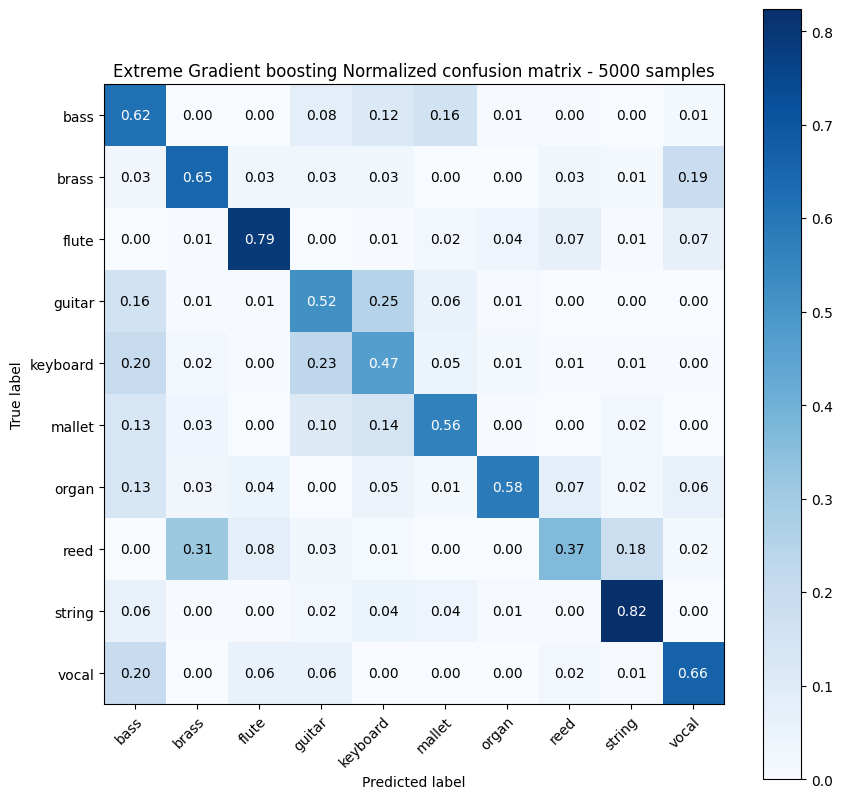

In [ ]:
plot_confusion_matrix(y_test, y_pred_XGB_classes, classes=class_names, normalize=True,
                      title='Extreme Gradient boosting Normalized confusion matrix - 5000 samples')